In [96]:
import numpy as np 
import json as json
import glob as glob
import zipfile as zipfile
import json as json
from nltk.tokenize import word_tokenize
import pandas as pd 
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string

# from fancyimpute import BiScaler, KNN, NuclearNormMinimization, SoftImpute, MICE
# import patsy

In [97]:
pd.set_option('display.max_colwidth', -1)

pd.set_option('display.max_rows', 1000)

In [98]:
category = pd.read_csv('categories_titles.csv',error_bad_lines=False)
# clean_votes = pd.read_csv('clean_votes.csv',error_bad_lines=False)
country_code=pd.read_csv('country_codes_final.csv',error_bad_lines=False)

In [99]:
category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563090 entries, 0 to 563089
Data columns (total 8 columns):
symbol      563090 non-null object
title       563090 non-null object
descr1      563090 non-null object
category    563090 non-null object
year        563090 non-null int64
voted       563090 non-null object
country     563090 non-null object
date        563090 non-null object
dtypes: int64(1), object(7)
memory usage: 34.4+ MB


In [100]:
# clean_votes['country'].unique()

In [101]:
# country_code['country']=country_code['country'].apply(lambda x: x.upper())
# country_code.to_csv(path_or_buf="/Users/uncontract/Documents/UN_data/UN_Resolution/PART2/country_codes_capital.csv", index=False)

In [102]:
# data1=pd.merge(country_code, clean_votes, on=['country'])

In [103]:
category['country'].nunique()

201

In [104]:
category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563090 entries, 0 to 563089
Data columns (total 8 columns):
symbol      563090 non-null object
title       563090 non-null object
descr1      563090 non-null object
category    563090 non-null object
year        563090 non-null int64
voted       563090 non-null object
country     563090 non-null object
date        563090 non-null object
dtypes: int64(1), object(7)
memory usage: 34.4+ MB


In [105]:
data2=pd.merge(category, country_code, on=['country']);
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 551784 entries, 0 to 551783
Data columns (total 10 columns):
symbol      551784 non-null object
title       551784 non-null object
descr1      551784 non-null object
category    551784 non-null object
year        551784 non-null int64
voted       551784 non-null object
country     551784 non-null object
date        551784 non-null object
a2          551784 non-null object
a3          551784 non-null object
dtypes: int64(1), object(9)
memory usage: 46.3+ MB


In [106]:
data2['country'].nunique()

197

In [107]:
data2['country'].unique()

array(['AFGHANISTAN', 'ALBANIA', 'ALGERIA', 'ANGOLA', 'ARGENTINA',
       'AUSTRALIA', 'AUSTRIA', 'BAHAMAS', 'BAHRAIN', 'BANGLADESH',
       'BARBADOS', 'BELGIUM', 'BELIZE', 'BENIN', 'BHUTAN', 'BOLIVIA',
       'BOTSWANA', 'BRAZIL', 'BULGARIA', 'MYANMAR', 'BURUNDI', 'BELARUS',
       'CANADA', 'CAPE VERDE', 'CENTRAL AFRICAN REPUBLIC', 'CHAD', 'CHILE',
       'CHINA', 'COLOMBIA', 'COMOROS', 'CONGO', 'COSTA RICA', 'CUBA',
       'CYPRUS', 'CAMBODIA', 'YEMEN', 'DENMARK', 'DJIBOUTI',
       'DOMINICAN REPUBLIC', 'ECUADOR', 'EGYPT', 'EL SALVADOR',
       'EQUATORIAL GUINEA', 'ETHIOPIA', 'FIJI', 'FINLAND', 'FRANCE',
       'GABON', 'GAMBIA', 'GERMAN DEMOCRATIC REPUBLIC', 'GERMANY', 'GHANA',
       'GREECE', 'GUATEMALA', 'GUINEA', 'GUINEA-BISSAU', 'GUYANA', 'HAITI',
       'HONDURAS', 'HUNGARY', 'ICELAND', 'INDIA', 'INDONESIA', 'IRAN',
       'IRAQ', 'IRELAND', 'ISRAEL', 'ITALY', "COTE D'IVOIRE", 'JAMAICA',
       'JAPAN', 'JORDAN', 'KENYA', 'KUWAIT', 'LEBANON', 'LESOTHO',
       'LIBERIA', '

In [108]:
def coded_voted(voted):
    for x in voted:
        if voted=='Y':
            return 1
        if voted=='N':
            return -1
        if voted =='A':
            return 0
        
data2['code_vote']=data2['voted'].map(coded_voted)

In [109]:
data2['code_vote'].value_counts()

 1    459101
 0    64432 
-1    28251 
Name: code_vote, dtype: int64

In [110]:
data=data2[['country', 'code_vote','symbol']]

In [112]:
df=data.groupby(['country', 'symbol'])['code_vote'].aggregate('mean')
df.reset_index()

,country,symbol,code_vote
0,AFGHANISTAN,A/RES/35/10B,0.0
1,AFGHANISTAN,A/RES/35/113,0.0
2,AFGHANISTAN,A/RES/35/115A,-1.0
3,AFGHANISTAN,A/RES/35/115B,-1.0
4,AFGHANISTAN,A/RES/35/118,1.0
5,AFGHANISTAN,A/RES/35/119,1.0
6,AFGHANISTAN,A/RES/35/120,1.0
7,AFGHANISTAN,A/RES/35/122A,1.0
8,AFGHANISTAN,A/RES/35/122B,1.0
9,AFGHANISTAN,A/RES/35/122C,1.0


In [111]:
df=data.groupby(['country', 'symbol'])['code_vote'].aggregate('mean').unstack()
df.reset_index()


symbol,country,A/RES/35/10B,A/RES/35/113,A/RES/35/115A,A/RES/35/115B,A/RES/35/118,A/RES/35/119,A/RES/35/120,A/RES/35/122A,A/RES/35/122B,...,A/RES/ES-7/4,A/RES/ES-7/5,A/RES/ES-7/6,A/RES/ES-7/7,A/RES/ES-7/8,A/RES/ES-7/9,A/RES/ES-8/1A,A/RES/ES-8/2,A/RES/ES-9/1,A/RES/S-14/1
0,AFGHANISTAN,0.0,0.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
1,ALBANIA,NaN,NaN,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,ALGERIA,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,ANDORRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ANGOLA,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,ANTIGUA AND BARBUDA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ARGENTINA,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
7,ARMENIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,AUSTRALIA,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,-1.0,1.0,0.0,0.0,0.0,1.0,-1.0,0.0,-1.0,0.0
9,AUSTRIA,1.0,NaN,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,-1.0,1.0,1.0,1.0,0.0,1.0,-1.0,0.0,0.0,0.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, AFGHANISTAN to ZIMBABWE
Columns: 3524 entries, A/RES/35/10B to A/RES/S-14/1
dtypes: float64(3524)
memory usage: 5.3+ MB


In [17]:
# df['missing']=df.apply(lambda x: x.count(), axis=1)

# df['missing_diff']=df['missing'].apply(lambda x: (x-3524))

# df['missing_diff'].sum()/(3524*197)

In [18]:
# df['missing_diff']

In [19]:
# df['missing']

In [20]:
# data_missing=df[df['missing']>500]

# data_missing['missing_diff'].sum()/(930*153)

In [21]:
data_missing.info()

NameError: name 'data_missing' is not defined

In [22]:
data_set=df.reset_index()

In [23]:
data_set['country']

0                                    AFGHANISTAN
1                                        ALBANIA
2                                        ALGERIA
3                                        ANDORRA
4                                         ANGOLA
5                            ANTIGUA AND BARBUDA
6                                      ARGENTINA
7                                        ARMENIA
8                                      AUSTRALIA
9                                        AUSTRIA
10                                    AZERBAIJAN
11                                       BAHAMAS
12                                       BAHRAIN
13                                    BANGLADESH
14                                      BARBADOS
15                                       BELARUS
16                                       BELGIUM
17                                        BELIZE
18                                         BENIN
19                                        BHUTAN
20                  

In [24]:
data_cluster=data_set.iloc[:, 1:]

data_cluster

symbol,A/RES/35/10B,A/RES/35/113,A/RES/35/115A,A/RES/35/115B,A/RES/35/118,A/RES/35/119,A/RES/35/120,A/RES/35/122A,A/RES/35/122B,A/RES/35/122C,...,A/RES/ES-7/4,A/RES/ES-7/5,A/RES/ES-7/6,A/RES/ES-7/7,A/RES/ES-7/8,A/RES/ES-7/9,A/RES/ES-8/1A,A/RES/ES-8/2,A/RES/ES-9/1,A/RES/S-14/1
0,0.0,0.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
1,NaN,NaN,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,-1.0,1.0,0.0,0.0,0.0,1.0,-1.0,0.0,-1.0,0.0
9,1.0,NaN,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,-1.0,1.0,1.0,1.0,0.0,1.0,-1.0,0.0,0.0,0.0


In [25]:
# df=data_set.reset_index(drop=True)

# df

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, AFGHANISTAN to ZIMBABWE
Columns: 3524 entries, A/RES/35/10B to A/RES/S-14/1
dtypes: float64(3524)
memory usage: 5.3+ MB


In [29]:
X=data_cluster.as_matrix().astype(float)

In [30]:
X_incomplete = X.copy()

In [37]:
c=df.fillna(df.mean())
c

symbol,A/RES/35/10B,A/RES/35/113,A/RES/35/115A,A/RES/35/115B,A/RES/35/118,A/RES/35/119,A/RES/35/120,A/RES/35/122A,A/RES/35/122B,A/RES/35/122C,...,A/RES/ES-7/4,A/RES/ES-7/5,A/RES/ES-7/6,A/RES/ES-7/7,A/RES/ES-7/8,A/RES/ES-7/9,A/RES/ES-8/1A,A/RES/ES-8/2,A/RES/ES-9/1,A/RES/S-14/1
country,,,,,,,,,,,,,,,,,,,,,
AFGHANISTAN,0.000000,0.0,-1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000,1.000000,1.000000,1.000000,1.000000,1.00000,0.00000,1.000000,1.000000
ALBANIA,0.646465,0.7,-1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000
ALGERIA,0.646465,1.0,0.792929,0.782828,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000
ANDORRA,0.646465,0.7,0.792929,0.782828,0.780142,0.894366,0.965035,0.978417,0.964286,0.805755,...,0.452899,0.968,0.826087,0.841727,0.720149,0.972414,0.64539,0.81295,0.448905,0.834483
ANGOLA,0.646465,0.7,0.792929,0.782828,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000
ANTIGUA AND BARBUDA,0.646465,0.7,0.792929,0.782828,0.780142,0.894366,0.965035,0.978417,0.964286,0.805755,...,0.452899,0.968,0.826087,0.841727,0.720149,0.972414,0.64539,0.81295,0.448905,0.834483
ARGENTINA,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,0.000000,1.000000
ARMENIA,0.646465,0.7,0.792929,0.782828,0.780142,0.894366,0.965035,0.978417,0.964286,0.805755,...,0.452899,0.968,0.826087,0.841727,0.720149,0.972414,0.64539,0.81295,0.448905,0.834483
AUSTRALIA,0.000000,0.0,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,-1.000000,1.000,0.000000,0.000000,0.000000,1.000000,-1.00000,0.00000,-1.000000,0.000000


In [215]:
from fancyimpute import BiScaler, KNN, NuclearNormMinimization, SoftImpute, MICE,MatrixFactorization

X_filled_nnm = MatrixFactorization().complete(X_incomplete)

Train on 492585 samples, validate on 54732 samples
Epoch 1/10000
 - 1s - loss: 1.1416 - val_loss: 1.1258
Epoch 2/10000
 - 0s - loss: 1.1394 - val_loss: 1.1246
Epoch 3/10000
 - 0s - loss: 1.1377 - val_loss: 1.1235
Epoch 4/10000
 - 0s - loss: 1.1362 - val_loss: 1.1224
Epoch 5/10000
 - 0s - loss: 1.1347 - val_loss: 1.1212
Epoch 6/10000
 - 0s - loss: 1.1331 - val_loss: 1.1201
Epoch 7/10000
 - 0s - loss: 1.1315 - val_loss: 1.1189
Epoch 8/10000
 - 0s - loss: 1.1299 - val_loss: 1.1178
Epoch 9/10000
 - 0s - loss: 1.1283 - val_loss: 1.1166
Epoch 10/10000
 - 0s - loss: 1.1267 - val_loss: 1.1154
Epoch 11/10000
 - 0s - loss: 1.1250 - val_loss: 1.1142
Epoch 12/10000
 - 0s - loss: 1.1234 - val_loss: 1.1129
Epoch 13/10000
 - 0s - loss: 1.1216 - val_loss: 1.1116
Epoch 14/10000
 - 0s - loss: 1.1199 - val_loss: 1.1104
Epoch 15/10000
 - 0s - loss: 1.1182 - val_loss: 1.1091
Epoch 16/10000
 - 0s - loss: 1.1165 - val_loss: 1.1078
Epoch 17/10000
 - 0s - loss: 1.1147 - val_loss: 1.1066
Epoch 18/10000
 - 0s - 

Epoch 149/10000
 - 0s - loss: 0.9165 - val_loss: 0.9420
Epoch 150/10000
 - 0s - loss: 0.9147 - val_loss: 0.9404
Epoch 151/10000
 - 0s - loss: 0.9130 - val_loss: 0.9388
Epoch 152/10000
 - 0s - loss: 0.9112 - val_loss: 0.9371
Epoch 153/10000
 - 0s - loss: 0.9094 - val_loss: 0.9355
Epoch 154/10000
 - 0s - loss: 0.9076 - val_loss: 0.9338
Epoch 155/10000
 - 0s - loss: 0.9058 - val_loss: 0.9321
Epoch 156/10000
 - 0s - loss: 0.9039 - val_loss: 0.9304
Epoch 157/10000
 - 0s - loss: 0.9021 - val_loss: 0.9287
Epoch 158/10000
 - 0s - loss: 0.9003 - val_loss: 0.9270
Epoch 159/10000
 - 0s - loss: 0.8984 - val_loss: 0.9253
Epoch 160/10000
 - 0s - loss: 0.8966 - val_loss: 0.9236
Epoch 161/10000
 - 0s - loss: 0.8947 - val_loss: 0.9219
Epoch 162/10000
 - 0s - loss: 0.8928 - val_loss: 0.9202
Epoch 163/10000
 - 0s - loss: 0.8910 - val_loss: 0.9184
Epoch 164/10000
 - 0s - loss: 0.8891 - val_loss: 0.9167
Epoch 165/10000
 - 0s - loss: 0.8872 - val_loss: 0.9149
Epoch 166/10000
 - 0s - loss: 0.8853 - val_loss:

Epoch 296/10000
 - 0s - loss: 0.6766 - val_loss: 0.7235
Epoch 297/10000
 - 0s - loss: 0.6755 - val_loss: 0.7225
Epoch 298/10000
 - 0s - loss: 0.6744 - val_loss: 0.7216
Epoch 299/10000
 - 0s - loss: 0.6733 - val_loss: 0.7207
Epoch 300/10000
 - 0s - loss: 0.6723 - val_loss: 0.7198
Epoch 301/10000
 - 0s - loss: 0.6712 - val_loss: 0.7188
Epoch 302/10000
 - 0s - loss: 0.6701 - val_loss: 0.7179
Epoch 303/10000
 - 0s - loss: 0.6691 - val_loss: 0.7170
Epoch 304/10000
 - 0s - loss: 0.6680 - val_loss: 0.7161
Epoch 305/10000
 - 0s - loss: 0.6670 - val_loss: 0.7152
Epoch 306/10000
 - 0s - loss: 0.6659 - val_loss: 0.7143
Epoch 307/10000
 - 0s - loss: 0.6649 - val_loss: 0.7134
Epoch 308/10000
 - 0s - loss: 0.6638 - val_loss: 0.7126
Epoch 309/10000
 - 0s - loss: 0.6628 - val_loss: 0.7117
Epoch 310/10000
 - 0s - loss: 0.6618 - val_loss: 0.7108
Epoch 311/10000
 - 0s - loss: 0.6607 - val_loss: 0.7099
Epoch 312/10000
 - 0s - loss: 0.6597 - val_loss: 0.7091
Epoch 313/10000
 - 0s - loss: 0.6587 - val_loss:

Epoch 443/10000
 - 0s - loss: 0.5490 - val_loss: 0.6193
Epoch 444/10000
 - 0s - loss: 0.5483 - val_loss: 0.6188
Epoch 445/10000
 - 0s - loss: 0.5476 - val_loss: 0.6183
Epoch 446/10000
 - 0s - loss: 0.5469 - val_loss: 0.6177
Epoch 447/10000
 - 0s - loss: 0.5463 - val_loss: 0.6172
Epoch 448/10000
 - 0s - loss: 0.5456 - val_loss: 0.6167
Epoch 449/10000
 - 0s - loss: 0.5449 - val_loss: 0.6161
Epoch 450/10000
 - 0s - loss: 0.5442 - val_loss: 0.6156
Epoch 451/10000
 - 0s - loss: 0.5436 - val_loss: 0.6151
Epoch 452/10000
 - 0s - loss: 0.5429 - val_loss: 0.6146
Epoch 453/10000
 - 0s - loss: 0.5422 - val_loss: 0.6140
Epoch 454/10000
 - 0s - loss: 0.5415 - val_loss: 0.6135
Epoch 455/10000
 - 0s - loss: 0.5409 - val_loss: 0.6130
Epoch 456/10000
 - 0s - loss: 0.5402 - val_loss: 0.6125
Epoch 457/10000
 - 0s - loss: 0.5396 - val_loss: 0.6120
Epoch 458/10000
 - 0s - loss: 0.5389 - val_loss: 0.6115
Epoch 459/10000
 - 0s - loss: 0.5383 - val_loss: 0.6110
Epoch 460/10000
 - 0s - loss: 0.5376 - val_loss:

Epoch 590/10000
 - 0s - loss: 0.4710 - val_loss: 0.5603
Epoch 591/10000
 - 0s - loss: 0.4706 - val_loss: 0.5600
Epoch 592/10000
 - 0s - loss: 0.4702 - val_loss: 0.5597
Epoch 593/10000
 - 0s - loss: 0.4698 - val_loss: 0.5594
Epoch 594/10000
 - 0s - loss: 0.4694 - val_loss: 0.5591
Epoch 595/10000
 - 0s - loss: 0.4690 - val_loss: 0.5588
Epoch 596/10000
 - 0s - loss: 0.4687 - val_loss: 0.5586
Epoch 597/10000
 - 0s - loss: 0.4683 - val_loss: 0.5583
Epoch 598/10000
 - 0s - loss: 0.4679 - val_loss: 0.5580
Epoch 599/10000
 - 0s - loss: 0.4675 - val_loss: 0.5577
Epoch 600/10000
 - 0s - loss: 0.4671 - val_loss: 0.5574
Epoch 601/10000
 - 0s - loss: 0.4667 - val_loss: 0.5572
Epoch 602/10000
 - 0s - loss: 0.4664 - val_loss: 0.5569
Epoch 603/10000
 - 0s - loss: 0.4660 - val_loss: 0.5566
Epoch 604/10000
 - 0s - loss: 0.4656 - val_loss: 0.5563
Epoch 605/10000
 - 0s - loss: 0.4652 - val_loss: 0.5561
Epoch 606/10000
 - 0s - loss: 0.4649 - val_loss: 0.5558
Epoch 607/10000
 - 0s - loss: 0.4645 - val_loss:

In [216]:
X_filled_nnm

array([[ 0.        ,  0.        , -1.        , ...,  0.        ,
         1.        ,  1.        ],
       [ 0.21634125, -0.28600278, -1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 0.99386879,  1.        ,  0.65855566, ...,  1.        ,
         1.        ,  1.        ],
       ..., 
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 0.95035162,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ]])

In [217]:
df_impute=pd.DataFrame(X_filled_nnm)

df_impute

,0,1,2,3,4,5,6,7,8,9,...,3514,3515,3516,3517,3518,3519,3520,3521,3522,3523
0,0.000000,0.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
1,0.216341,-0.286003,-1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,0.993869,1.000000,0.658556,0.650856,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,0.149198,0.413536,0.728284,0.706224,0.098570,0.629109,0.925621,1.023276,1.033146,0.341722,...,-0.495491,1.047073,0.425852,0.427213,0.291878,1.021170,-0.386774,0.286582,-0.493488,0.237372
4,0.929503,0.653094,0.409618,0.408873,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5,0.926492,1.016623,0.915477,0.826055,0.878992,0.934067,0.947156,0.995110,0.981758,0.848213,...,0.554173,0.965310,0.933067,0.972530,0.909159,0.979939,0.877905,1.056801,0.606051,0.906762
6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
7,0.422327,0.265859,0.495262,0.517617,1.074626,0.918089,1.010451,1.001935,0.948370,0.958233,...,0.611212,1.050699,0.895807,0.841881,0.723314,1.046275,0.843636,0.655600,0.554920,0.939135
8,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,-1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,-1.000000,0.000000
9,1.000000,0.595548,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,-1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000


In [75]:
df_impute=c

In [38]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(c)

In [39]:
covMat = np.cov(X_scaled.T)


In [40]:
eigenValues, eigenVectors = np.linalg.eig(covMat)

In [41]:
print (len(eigenValues))
print (len(eigenVectors))

3524
3524


In [42]:
# print (eigenValues)

In [44]:
totalEigen = sum(eigenValues)
varExpl = [(i / totalEigen)*100 for i in sorted(eigenValues, reverse=True)]

# print(varExpl)

In [45]:
cvarex = np.cumsum(varExpl);
cvarex[:50]

array([ 34.39970558+0.j,  47.55694076+0.j,  53.43935671+0.j,
        58.25187749+0.j,  61.32356110+0.j,  63.93209154+0.j,
        65.99983669+0.j,  68.02368119+0.j,  69.58175542+0.j,
        70.82996116+0.j,  71.97311028+0.j,  72.93626838+0.j,
        73.81234546+0.j,  74.62549851+0.j,  75.37342438+0.j,
        76.04928424+0.j,  76.70657266+0.j,  77.31460608+0.j,
        77.88531821+0.j,  78.40077764+0.j,  78.90233400+0.j,
        79.36779556+0.j,  79.83137827+0.j,  80.25985433+0.j,
        80.67185815+0.j,  81.07320296+0.j,  81.46017063+0.j,
        81.84228063+0.j,  82.20921317+0.j,  82.57106448+0.j,
        82.91827568+0.j,  83.25876584+0.j,  83.58947173+0.j,
        83.91423854+0.j,  84.22901791+0.j,  84.52613314+0.j,
        84.81962861+0.j,  85.10519544+0.j,  85.38160915+0.j,
        85.64801824+0.j,  85.91391117+0.j,  86.17419005+0.j,
        86.42613739+0.j,  86.67539785+0.j,  86.91593608+0.j,
        87.15329954+0.j,  87.38754663+0.j,  87.61804729+0.j,
        87.84449330+0.j,

In [46]:
from sklearn.decomposition import PCA 

pcask = PCA(n_components=50)
print (pcask.fit(X_scaled).components_) # See the eigenvectors
xPC = pcask.fit_transform(X_scaled) 

[[-0.02112494 -0.00551669  0.00119643 ..., -0.01960407 -0.01970536
  -0.02270551]
 [ 0.00283863  0.00382621  0.00117674 ...,  0.01875132  0.01254279
   0.01638111]
 [ 0.00584487 -0.02051161 -0.03058453 ...,  0.01843866  0.01985898
   0.01622126]
 ..., 
 [-0.0252097  -0.01452442 -0.03633686 ..., -0.00607835  0.00661404
  -0.01853855]
 [ 0.00723096  0.00864825 -0.00845533 ..., -0.01296555  0.00528435
  -0.01261087]
 [ 0.01644716 -0.00933351  0.02037892 ..., -0.00917697 -0.00688426
  -0.00921343]]


In [47]:
PCdf = pd.DataFrame(xPC, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10',\
                                  'PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20',\
                                  'PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30',\
                                 'PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40',\
                                 'PC41','PC42','PC43','PC44','PC45','PC46','PC47','PC48','PC49','PC50'])

PCdf.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50
0,-10.658323,21.664650,10.160771,27.859583,12.337082,9.874491,-2.325044,-17.511951,-20.433164,47.841238,...,-0.361796,0.780058,-0.329856,-0.321483,0.891787,1.664452,0.092845,1.078947,-0.434905,-0.684764
1,13.483920,-17.864305,28.581761,11.510545,-2.384405,-8.210810,-2.338639,10.207600,-6.162954,-0.280558,...,-3.523912,-0.148363,-4.015500,6.681355,4.875789,-7.106240,7.987388,9.860713,-2.778040,0.552766
2,-26.664157,8.568615,-3.871129,7.860577,3.995911,6.543827,-5.377019,1.364225,-5.840813,-5.866836,...,-4.769698,-3.375031,3.023310,-0.533097,1.159534,2.967647,2.707270,-0.146295,1.426374,-3.115778
3,17.534387,-19.751665,17.520213,3.405775,-2.473402,-10.925200,-3.417575,11.082759,0.008644,-1.140527,...,0.906658,-0.687245,1.435264,-0.426925,-1.741507,2.029175,-1.050528,-0.667058,0.584313,-1.467858
4,-21.050786,7.086793,2.028302,9.358309,2.064336,4.901430,1.164584,-3.397364,1.652044,-1.121684,...,1.804653,-5.929811,0.073033,1.558346,-8.156607,-0.824646,1.451055,-0.206035,3.655898,-2.402761


In [49]:
data_reset=df.reset_index()
data_imp_reset=c.reset_index()
# data_imp_reset.reset_index()

data_imp_reset

symbol,country,A/RES/35/10B,A/RES/35/113,A/RES/35/115A,A/RES/35/115B,A/RES/35/118,A/RES/35/119,A/RES/35/120,A/RES/35/122A,A/RES/35/122B,...,A/RES/ES-7/4,A/RES/ES-7/5,A/RES/ES-7/6,A/RES/ES-7/7,A/RES/ES-7/8,A/RES/ES-7/9,A/RES/ES-8/1A,A/RES/ES-8/2,A/RES/ES-9/1,A/RES/S-14/1
0,AFGHANISTAN,0.000000,0.0,-1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000,1.000000,1.000000,1.000000,1.000000,1.00000,0.00000,1.000000,1.000000
1,ALBANIA,0.646465,0.7,-1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000
2,ALGERIA,0.646465,1.0,0.792929,0.782828,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000
3,ANDORRA,0.646465,0.7,0.792929,0.782828,0.780142,0.894366,0.965035,0.978417,0.964286,...,0.452899,0.968,0.826087,0.841727,0.720149,0.972414,0.64539,0.81295,0.448905,0.834483
4,ANGOLA,0.646465,0.7,0.792929,0.782828,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000
5,ANTIGUA AND BARBUDA,0.646465,0.7,0.792929,0.782828,0.780142,0.894366,0.965035,0.978417,0.964286,...,0.452899,0.968,0.826087,0.841727,0.720149,0.972414,0.64539,0.81295,0.448905,0.834483
6,ARGENTINA,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,0.000000,1.000000
7,ARMENIA,0.646465,0.7,0.792929,0.782828,0.780142,0.894366,0.965035,0.978417,0.964286,...,0.452899,0.968,0.826087,0.841727,0.720149,0.972414,0.64539,0.81295,0.448905,0.834483
8,AUSTRALIA,0.000000,0.0,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,-1.000000,1.000,0.000000,0.000000,0.000000,1.000000,-1.00000,0.00000,-1.000000,0.000000
9,AUSTRIA,1.000000,0.7,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,-1.000000,1.000,1.000000,1.000000,0.000000,1.000000,-1.00000,0.00000,0.000000,0.000000


In [228]:

# df1 = pd.concat([PCdf, data_cluster])



In [50]:
# df2 = pd.concat([PCdf, data_reset], axis=1)

df_imp = pd.concat([PCdf, data_imp_reset,data_set['country']], axis=1)

len(df_imp)

197

In [51]:
from sklearn.cluster import KMeans

distortions2 = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(xPC)
    distortions2.append(km.inertia_)
dist2 = pd.DataFrame(distortions2)

/Users/Marina/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


NameError: name 'dist1' is not defined

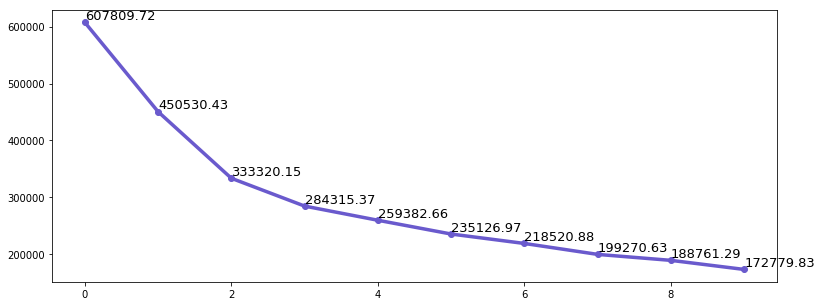

In [52]:
# plt.plot(dist1, marker='o', color='y',  linewidth = 3.5, label='Original Data')
plt.figure(figsize=(13,5))
plt.plot(dist2, marker='o', color='slateblue',  linewidth = 3.5, label='PCA-transformed Data')

# for i, label in enumerate(list(dist1.index)):
#     score = dist1.ix[label][0].round(2)
#     plt.annotate(str(score), (i, score+2),ha='left', va="bottom", size=13) 

for i, label in enumerate(list(dist2.index)):
    score = dist2.ix[label][0].round(2)
    plt.annotate(str(score), (i, score+2),ha='left', va="bottom", size=13) 
    
plt.xlim([-.5, len(dist1)])
plt.ylim([1000, 15000])
plt.xticks(range(0,11,1),fontsize=15)

ax = plt.gca()
ax.set_xticklabels(range(1,11))
plt.legend(fontsize=14)
plt.xlabel('Number of clusters',fontsize=18)
plt.ylabel('Distortion',fontsize=18)
plt.title("Inertia Values for KMeans Analyses", fontsize=22, y=1.04)

plt.axvline(0, color='black', alpha = 0.5, linewidth = 1,linestyle='--')
plt.grid(color='gray', linestyle='--', alpha=.3)
plt.show()

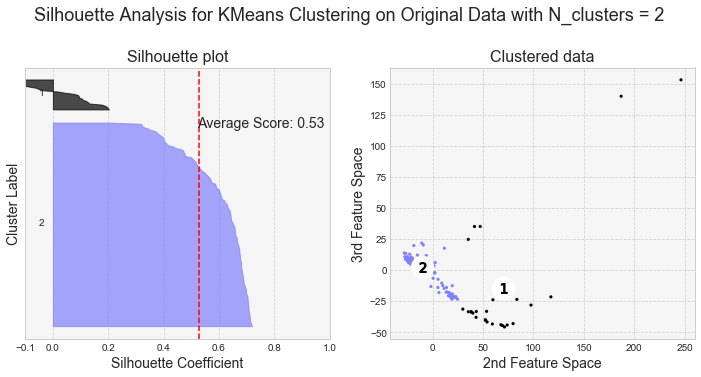

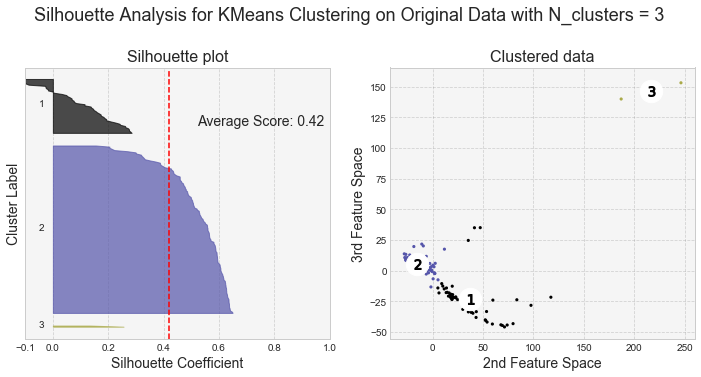

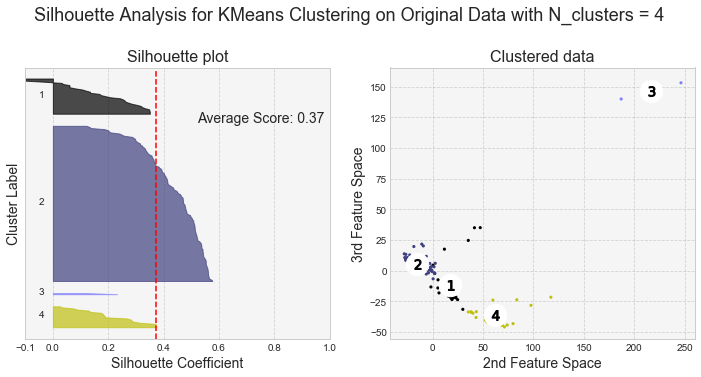

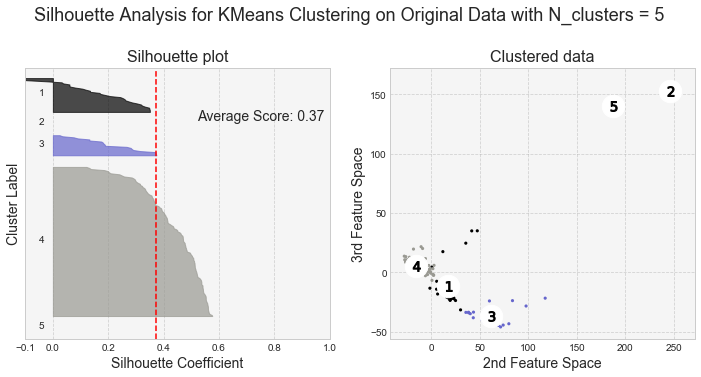

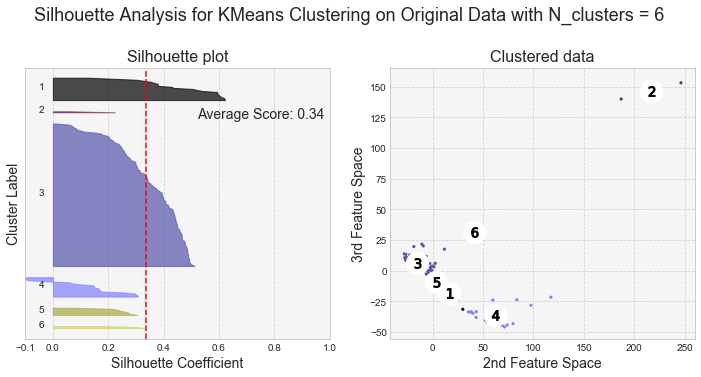

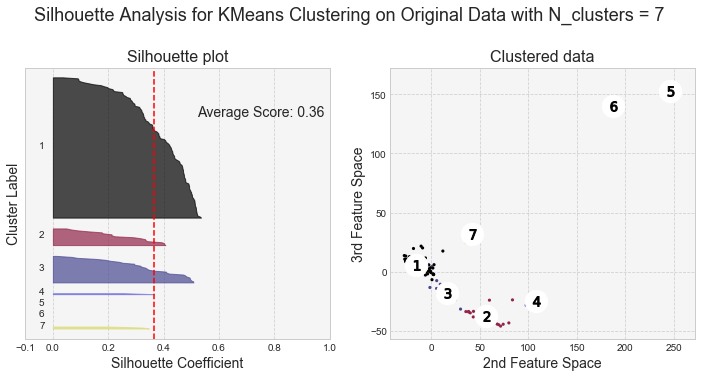

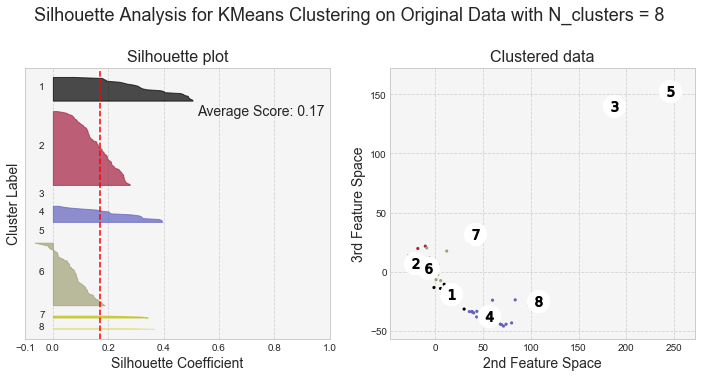

In [53]:
plt.style.use('seaborn-whitegrid')


plt.rcParams['axes.facecolor'] = 'whitesmoke'
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples,silhouette_score

X=xPC 

range_n_clusters = [2,3,4,5,6,7,8]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(12, 5)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters)
    labels= clusterer.fit(X)
    cluster_labels=labels.labels_


    silhouette_avg = silhouette_score(X, cluster_labels)
    ax1.annotate('Average Score: %.2f' % silhouette_avg, xy=(1, 5), xytext=(0.52, 50),\
                 fontsize=14)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.gist_stern(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i+1))
        y_lower = y_upper + 10 

    ax1.set_title("Silhouette plot",fontsize=16)
    ax1.set_xlabel("Silhouette Coefficient",fontsize=14)
    ax1.set_ylabel("Cluster Label",fontsize=14)
    

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    ax1.grid(color='gray', linestyle='--', alpha=.3)
    ax1.invert_yaxis()

    ax1.set_yticks([]) 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

 
    colors = plt.cm.gist_stern(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=40, lw=0,
                c=colors)
    centers = clusterer.cluster_centers_

    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=500)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % (i+1), alpha=1, s=100,color='k')



    ax2.set_title("Clustered data", fontsize=16)
    ax2.set_xlabel("2nd Feature Space",fontsize=14)
    ax2.set_ylabel("3rd Feature Space",fontsize=14)
    ax2.grid(color='gray', linestyle='--', alpha=.3)

    plt.suptitle(("Silhouette Analysis for KMeans Clustering on Original Data "
                  "with N_clusters = %d" % n_clusters),
                 fontsize=18, y=1.05)

    plt.show()

In [76]:
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit(xPC)

In [77]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
clusters

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [78]:

# df2['cluster'] = pd.Series(clusters.labels_+1)
df_imp['cluster'] = pd.Series(clusters.labels_+1)

In [79]:
def colors(cluster):
    if cluster==1:
        return 'fuchsia'
    if cluster==2:
        return 'green'
    if cluster==3:
        return 'blue'
#     if cluster==4:
#         return 'yellow'
    else: 
        return 'k'




df_imp['color']=df_imp['cluster'].map(colors)

In [80]:
df1=df_imp[df_imp['cluster']==1]

In [81]:
df1['country']

,country,country
0,AFGHANISTAN,AFGHANISTAN
2,ALGERIA,ALGERIA
4,ANGOLA,ANGOLA
5,ANTIGUA AND BARBUDA,ANTIGUA AND BARBUDA
6,ARGENTINA,ARGENTINA
7,ARMENIA,ARMENIA
10,AZERBAIJAN,AZERBAIJAN
11,BAHAMAS,BAHAMAS
12,BAHRAIN,BAHRAIN
13,BANGLADESH,BANGLADESH


In [82]:
df2=df_imp[df_imp['cluster']==2]

In [93]:
df2['country']



,country,country


In [84]:
df2=df_imp[df_imp['cluster']==3]

df2['country']

,country,country
1,ALBANIA,ALBANIA
3,ANDORRA,ANDORRA
21,BOSNIA AND HERZEGOVINA,BOSNIA AND HERZEGOVINA
25,BULGARIA,BULGARIA
41,CROATIA,CROATIA
43,CYPRUS,CYPRUS
56,ESTONIA,ESTONIA
63,GEORGIA,GEORGIA
67,GREECE,GREECE
75,HUNGARY,HUNGARY


In [85]:
# outliers=df2[df2['cluster']=='PC1']

In [86]:
df2=df_imp[df_imp['cluster']==4]

df2['country']

,country,country
82,ISRAEL,ISRAEL
186,UNITED STATES,UNITED STATES


In [87]:
df2=df_imp[df_imp['cluster']==5]

df2['country']

,country,country


In [88]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
X=xPC
ag = AgglomerativeClustering(n_clusters=5)
ag.fit_predict(xPC)
# y_kmeans = kmeans.predict(xPC)

array([1, 0, 1, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 1, 1, 0, 0, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 2, 4, 2, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       2, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 2, 1, 1, 1, 1, 2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

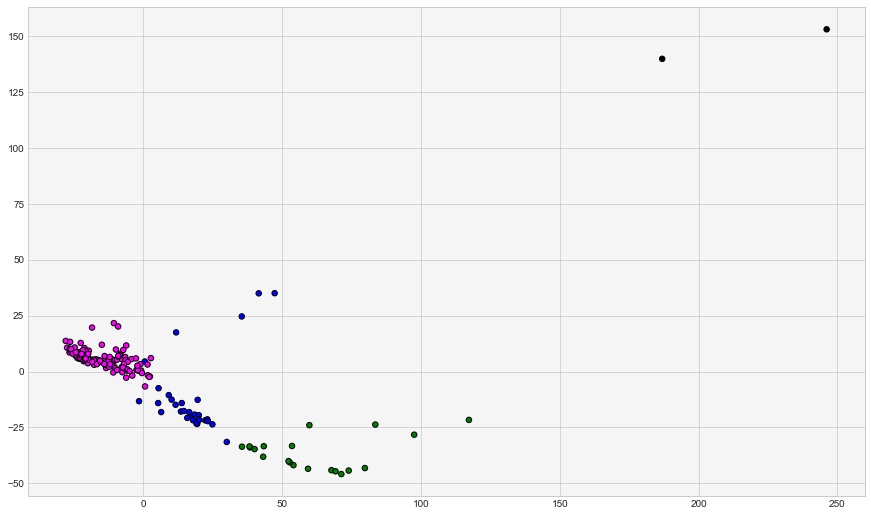

In [89]:
fig = plt.subplots(figsize=(15,9))



plt.scatter(X[:, 0], X[:, 1],s=30, c=df_imp['color'],edgecolor='k')

# centers = kmeans.cluster_centers_
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.1)

In [90]:
# df0=pd.merge(category, country_code, on=['coiuntry']);
# df0.info()

In [91]:
df1=pd.merge(df_imp, country_code, on=['country'])

df1['country']

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

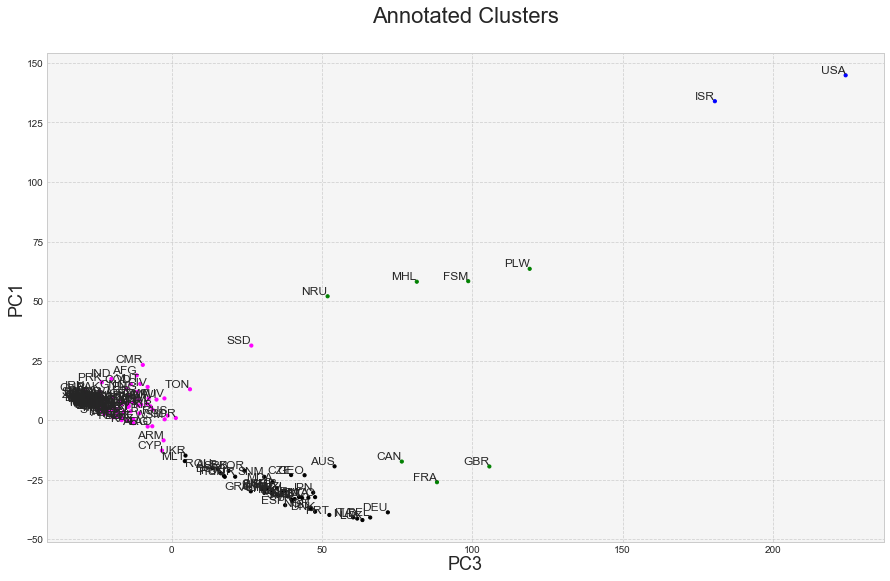

In [249]:
fig = plt.subplots(figsize=(15,9))


plt.scatter(X[:, 0], X[:, 1],s=10, c=df1['color'])
for i, country in enumerate(df1['a3']):
    plt.annotate(country, (df1.iloc[i].PC1, df1.iloc[i].PC2),fontsize=12,ha='right', va='bottom')
plt.title("Annotated Clusters", y=1.05,fontsize=22)
plt.xlabel('PC3',fontsize=18,labelpad=1)
plt.ylabel('PC1',fontsize=18,labelpad=1)
plt.grid(color='gray', linestyle='--', alpha=.3)

In [250]:
df_safe=df1[['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','country','color','cluster']]

In [244]:
# df_safe

In [245]:
df_safe.to_csv(path_or_buf="/Users/uncontract/Documents/UN_data/UN_Resolution/PART2/pc_cluster.csv", index=False)